In [190]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import queue
import pandas as pd
from itertools import cycle, islice

In [191]:
column_names = ('X','Y')
df=pd.read_csv('dataset1.txt', sep=' ',names = column_names)

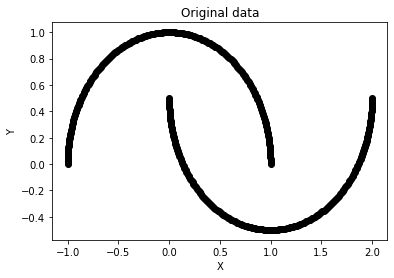

In [192]:
plt.scatter(df["X"],df["Y"],c='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original data')
plt.show()

In [193]:
dataset = df.astype(float).values.tolist()
X = StandardScaler().fit_transform(dataset)

In [194]:
class DBSCAN():

    def region_query(self, data, P,  epsilon):
  
        neighbors = []
        for Pn in range (len(data)):
            if np.linalg.norm(data[P] - data[Pn]) < epsilon:
                neighbors.append(Pn)
            
        return neighbors

    
    def cluster(self, data, Eps, MinPt):
        core = []
        border = []
        label = [0] * len(data)
        count = []

       
        for i in range(len(data)):
            count.append(self.region_query(data, i, Eps))

        
        for i in range(len(count)):
            if (len(count[i]) >= MinPt):
                label[i] = self.core
                core.append(i)
            else:
                border.append(i)    

        for i in border:
            for j in count[i]:
                if j in core:
                    label[i] = self.border
                    break

        c = 1

        for i in range(len(label)):
            q = queue.Queue()
            if (label[i] == self.core):
                label[i] = c
                for x in count[i]:
                    if(label[x] == self.core):
                        q.put(x)
                        label[x] = c
                    elif(label[x] == self.border):
                        label[x] = c
                while not q.empty():
                    neighbors = count[q.get()]
                    for y in neighbors:
                        if (label[y] == self.core):
                            label[y] = c
                            q.put(y)
                        if (label[y] == self.border):
                            label[y] = c
                c += 1 

        return label, c

    def __init__(self):
        self.core = -1
        self.border = -2
        
    def plot(self, data, c, no_of_Clusters):
        n = len(data)

        colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

        for x in range(no_of_Clusters):
            if (x == 0):
                
                color = '#000000'
            else:
                color = colors[x % len(colors)]

            a, b = [], []
            for y in range(n):
                if c[y] == x:
                    a.append(data[y, 0])
                    b.append(data[y, 1])
            plt.scatter(a, b, c=color, alpha=1, marker='.')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('DBScan clustered data after implementation')

In [195]:
print("Number of Clusters:",c)

Number of Clusters: 3


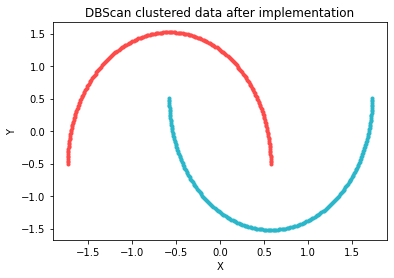

In [196]:
dbscan_instance = DBSCAN()
labels, c = dbscan_instance.cluster(X, 0.25, 4)
dbscan_instance.plot(X, labels, c)
plt.show()

DBSCAN IMPLEMENTATION FOR dataset2

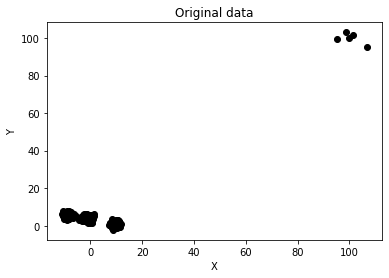

In [197]:
column_names = ('X','Y')
df1=pd.read_csv('dataset2.txt', sep=' ',names = column_names)
plt.scatter(df1["X"],df1["Y"],c='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original data')
plt.show()

In [198]:
dataset = df1.astype(float).values.tolist()
X1 = StandardScaler().fit_transform(dataset)

In [199]:
class DBSCAN():

    def region_query(self, data, P,  epsilon):
  
        neighbors = []
        for Pn in range (len(data)):
            if np.linalg.norm(data[P] - data[Pn]) < epsilon:
                neighbors.append(Pn)
            
        return neighbors

    
    def cluster(self, data, Eps, MinPt):
        core = []
        border = []
        label = [0] * len(data)
        count = []

       
        for i in range(len(data)):
            count.append(self.region_query(data, i, Eps))

        
        for i in range(len(count)):
            if (len(count[i]) >= MinPt):
                label[i] = self.core
                core.append(i)
            else:
                border.append(i)    

        for i in border:
            for j in count[i]:
                if j in core:
                    label[i] = self.border
                    break

        c = 1

        for i in range(len(label)):
            q = queue.Queue()
            if (label[i] == self.core):
                label[i] = c
                for x in count[i]:
                    if(label[x] == self.core):
                        q.put(x)
                        label[x] = c
                    elif(label[x] == self.border):
                        label[x] = c
                while not q.empty():
                    neighbors = count[q.get()]
                    for y in neighbors:
                        if (label[y] == self.core):
                            label[y] = c
                            q.put(y)
                        if (label[y] == self.border):
                            label[y] = c
                c += 1 

        return label, c

    def __init__(self):
        self.core = -1
        self.border = -2
        
    def plot(self, data, c, no_of_Clusters):
        n = len(data)

        colors = np.array(list(islice(cycle(['#FFD700', '#008B8B']), 3)))

        for x in range(no_of_Clusters):
            if (x == 0):
                
                color = '#800080'
            else:
                color = colors[x % len(colors)]

            a, b = [], []
            for y in range(n):
                if c[y] == x:
                    a.append(data[y, 0])
                    b.append(data[y, 1])
            plt.scatter(a, b, c=color, alpha=1, marker='.')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('DBScan clustered data after implementation')

In [200]:
print("Number of Clusters:",c)

Number of Clusters: 3


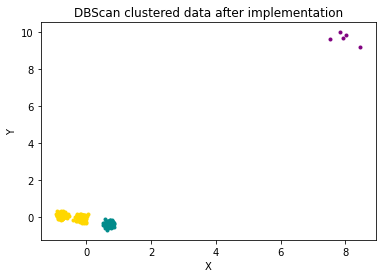

In [201]:
dbscan_instance = DBSCAN()
labels, c = dbscan_instance.cluster(X1, 0.25, 4)
dbscan_instance.plot(X1, labels, c)
plt.show()